In [9]:
import os
import pandas as pd
import numpy as np
import pathlib
import pickle
import matplotlib.pyplot as plt
import copy

# parameters

In [10]:
SEED = 12
file_path = '/Users/zhangxun/data/robust_scheduling/rand_release/num_jobs_adjusted_target/'
with open(file_path + 'para_info.pkl','rb') as tf:
    para = pickle.load(tf)
delta_mu = para['delta_mu'] # control lb of mean processing time
delta_r = para['delta_r'] # control ub of the release time
delta_ep = para['delta_ep'] # control the upper bound of the mad
delta_er = para['delta_er'] # control the upper bound of the mad
S_train = para['S_train']
S_test = para['S_test']
iterations = para['iterations']
instances = para['instances']
range_c = para['range_c']


In [11]:
def load_results(instances,file_path,file_name):
    rst_mean = np.zeros(instances)
    rst_75 = np.zeros(instances)
    rst_95 = np.zeros(instances)
    rst_time = np.zeros(instances)
    for ins in range(instances):
        full_path = file_path + 'ins='+str(ins)+'/'+ 'iteration='+str(0)+'/'
        # print(full_path)
        # deterministic results
        with open(full_path+file_name, "rb") as tf:
            sol = pickle.load(tf)
        rst_mean[ins] = np.mean(sol['out_obj'])
        rst_75[ins] = np.quantile(sol['out_obj'],0.75)
        rst_95[ins] = np.quantile(sol['out_obj'],0.95)
        rst_time[ins] = sol['time']
    rst = {}
    rst['avg'] = rst_mean
    rst['quan_75'] = rst_75
    rst['quan_95'] = rst_95
    rst['time'] = rst_time
    return rst


In [38]:
def load_wass_results(instances,range_c,file_path,file_name):
    len_c = len(range_c)
    avg = np.zeros((instances,len_c))
    quan75 = np.zeros((instances,len_c))
    quan95 = np.zeros((instances,len_c))
    time_arr = np.zeros((instances,len_c))

    index = 0
    for ins in range(instances):
        full_path = file_path + 'ins='+str(ins)+'/'+ 'iteration='+str(0)+'/'
        # print(full_path)
        # deterministic results
        if os.path.exists(full_path+file_name):
            with open(full_path+file_name, "rb") as tf:
                sol = pickle.load(tf)
            # print('ins',ins,'obj',sol['out_obj'].mean(axis=0).to_list())
            avg[index,:] = np.asarray(sol['out_obj'].mean(axis=0))
            quan75[index,:] = np.asarray(sol['out_obj'].quantile(axis = 0,q = 0.75))
            quan95[index,:] = np.asarray(sol['out_obj'].quantile(axis = 0,q = 0.95))
            time_arr[index] = sol['time']
            index = index + 1
    rst = {}
    rst['avg'] = avg[0:index,:]
    rst['quan_75'] = quan75[0:index,:]
    rst['quan_95'] = quan95[0:index,:]
    rst['time'] = time_arr[0:index,:]
    return rst

In [38]:
delta_er_all = np.arange(0.5,2.01,0.5)
delta_ep_all = np.arange(0.5,2.01,0.5)
det_rst = np.zeros((len(delta_er_all),len(delta_ep_all)))
saa_rst = np.zeros((len(delta_er_all),len(delta_ep_all)))
wass_rst = {}
metric_name = 'avg'
for i in range(len(delta_er_all)):
    delta_er = delta_er_all[i]
    for j in range(len(delta_ep_all)):
        delta_ep = delta_ep_all[j]
        print('delta_er=',delta_er,' delta_ep=',delta_ep)
        file_path1 = file_path + 'delta_er='+str(delta_er) + '/delta_ep='+str(delta_ep)+ '/'
        det_rst[i,j] = np.mean(load_results(instances,file_path1,'sol_det.pkl')[metric_name])
        saa_rst[i,j] = np.mean(load_results(instances,file_path1,'sol_saa.pkl')[metric_name])
        wass_rst[i,j] = np.mean(load_wass_results(instances,range_c,file_path1,'sol_wass_affine.pkl')[metric_name],axis = 0)


delta_er= 0.5  delta_ep= 0.5


FileNotFoundError: [Errno 2] No such file or directory: '/Users/zhangxun/data/robust_scheduling/rand_release/num_jobs_adjusted_target/delta_er=0.5/delta_ep=0.5/ins=0/iteration=0/sol_det.pkl'

In [306]:
saa_rst

array([[ 9533.64700564,  9604.17021577,  9659.73290541,  9978.87948151],
       [ 9522.769489  ,  9825.65876186,  9881.33552802, 10127.40526858],
       [ 9600.61725054,  9752.48251517,  9817.32657343, 10055.79684116],
       [ 9681.47910884,  9912.76686257,  9973.75362229, 10175.02329955]])

In [307]:
wass_rst

{(0,
  0): array([9528.4715999 , 9532.71832076, 9580.08826057, 9617.53013535,
        9678.04391443, 9726.05330553, 9789.29571962, 9776.25646818,
        9754.66339727, 9754.66339727, 9754.66339727, 9754.66339727,
        9754.66339727, 9754.66339727]),
 (0,
  1): array([9613.32747744, 9619.51049708, 9613.41153197, 9656.13046104,
        9685.64455894, 9730.4469905 , 9808.21525347, 9862.43050301,
        9863.48428225, 9896.46731584, 9909.38213045, 9905.94769828,
        9905.94769828, 9905.94769828]),
 (0,
  2): array([9670.63993185, 9661.61278575, 9661.49231973, 9677.0978844 ,
        9693.91675147, 9712.19932026, 9775.94642768, 9798.21893423,
        9886.74496765, 9888.40725014, 9910.88537738, 9954.65868563,
        9954.24134566, 9952.959705  ]),
 (0,
  3): array([ 9961.54663317,  9959.91048498,  9958.98984636,  9969.53196648,
         9983.33329438,  9982.55257446, 10042.40884523, 10082.10356609,
        10080.58578931, 10189.40791092, 10182.29492079, 10216.21392711,
        1026

In [308]:
# compute ratio
saa_ratio = saa_rst/det_rst
rs_ratio = {}
for i in range(len(delta_er_all)):
    delta_er = delta_er_all[i]
    for j in range(len(delta_ep_all)):
        delta_ep = delta_ep_all[j]
        rs_ratio[i,j] = wass_rst[i,j]/det_rst[i,j]

ratio_set = {}
ratio_set['saa'] = saa_ratio
ratio_set['rs'] = rs_ratio

In [309]:
file_path1 = '/Users/zhangxun/data/robust_scheduling/rand_release/release_processing_var/S='+str(10)+'/delta_r='+str(delta_r)
with open(file_path1+'_avg_ratio.pkl', "wb") as tf:
    pickle.dump(ratio_set,tf)

In [316]:
ratio_avg_set_all = {}
ratio_pt_set_all = {}
delta_r_all = [0.05,0.15,0.3]
for i in range(len(delta_r_all)):
    delta_r = delta_r_all[i]
    file_path1 = '/Users/zhangxun/data/robust_scheduling/rand_release/release_processing_var/S='+str(10)+'/delta_r='+str(delta_r)
    with open(file_path1 + '_avg_ratio.pkl','rb') as tf:
        rst = pickle.load(tf)
    ratio_avg_set_all[delta_r] = rst
    with open(file_path1 + '_pt_ratio.pkl','rb') as tf:
        rst = pickle.load(tf)
    ratio_pt_set_all[delta_r] = rst

In [329]:
ratio_pt_set_all[0.05]['rs']

{(0,
  0): array([1.00008999, 0.99413677, 0.98642637, 0.98325318, 0.98110811,
        0.97942881, 0.97853666, 0.97821044, 0.97819737, 0.97819737,
        0.97819737, 0.97819737, 0.97819737, 0.97819737]),
 (0,
  1): array([0.99887797, 0.9834923 , 0.96925077, 0.95699002, 0.9521778 ,
        0.9487948 , 0.94379774, 0.94174801, 0.94136418, 0.94067109,
        0.94066383, 0.94062214, 0.94062214, 0.94062214]),
 (0,
  2): array([0.99560606, 0.97974171, 0.96184655, 0.94965268, 0.94456052,
        0.93775425, 0.93046956, 0.92564065, 0.92262785, 0.92160142,
        0.92087455, 0.9203397 , 0.92015387, 0.92017319]),
 (0,
  3): array([0.99469728, 0.9787997 , 0.96348958, 0.95050462, 0.94280711,
        0.93690297, 0.92832119, 0.92227905, 0.91954335, 0.91799691,
        0.9159038 , 0.91431505, 0.91373561, 0.91375783]),
 (1,
  0): array([0.99941137, 0.99279771, 0.98725819, 0.98342046, 0.98249028,
        0.98152896, 0.98045053, 0.98010997, 0.97994917, 0.97994917,
        0.97994917, 0.97994917, 0.9799

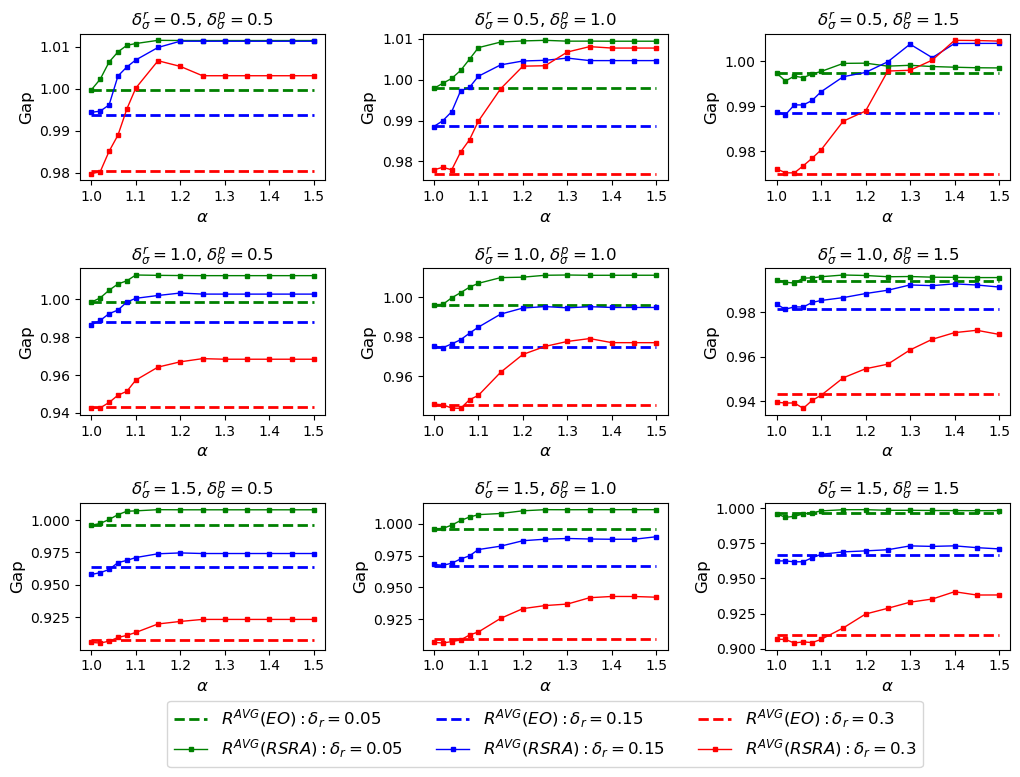

In [314]:
ms = 3
lw = 1
ticks = np.arange(1,1.501,0.1)
metric_name = 'avg'
color_set = ['g','b','r']
delta_er_all = np.arange(0.5,1.51,0.5)
delta_ep_all = np.arange(0.5,1.51,0.5)
fig,ax = plt.subplots(len(delta_er_all),len(delta_ep_all),figsize=(12, 8))
index = 0 
for i in range(len(delta_er_all)):
    delta_er = delta_er_all[i]
    for j in range(len(delta_ep_all)):
        # ax[i,j].plot(range_c,np.ones(len(range_c)),'-.',color = 'k',linewidth = lw)
        if metric_name == 'avg':
            for k in range(len(delta_r_all)):
                delta_r = delta_r_all[k]
                name1 = r'$R^{AVG}(EO):\delta_r='+str(delta_r)+'$'
                name2 = r'$R^{AVG}(RSRA):\delta_r='+str(delta_r)+'$'
                ax[i,j].plot(range_c,np.ones(len(range_c))*ratio_avg_set_all[delta_r]['saa'][i,j],'--',color = color_set[k],markersize=ms,linewidth = 2,label=name1)
                ax[i,j].plot(range_c,ratio_avg_set_all[delta_r]['rs'][i,j],'-s',color = color_set[k],markersize=ms,linewidth = lw,label=name2)
        else:
            for k in range(len(delta_r_all)):
                delta_r = delta_r_all[k]
                name1 = r'$R^{PT}_{95}(EO):\delta_r='+str(delta_r)+'$'
                name2 = r'$R^{PT}_{95}(RSRA):\delta_r='+str(delta_r)+'$'
                ax[i,j].plot(range_c,np.ones(len(range_c))*ratio_pt_set_all[delta_r]['saa'][i,j],'--',color = color_set[k],markersize=ms,linewidth = 2,label=name1)
                ax[i,j].plot(range_c,ratio_pt_set_all[delta_r]['rs'][i,j],'-s',color = color_set[k],markersize=ms,linewidth = lw,label=name2)


        ax[i,j].set_ylabel('Gap',fontsize = 12)
        ax[i,j].set_xlabel(r'$\alpha$',fontsize = 12)
        # ax[i,j].set_yticks(np.arange(0.88,1.01,0.04))
        ax[i,j].set_xticks(ticks)
        ax[i,j].set_title(r'$\delta^{r}_{\sigma}=$'+str(delta_er)+r', $\delta^{p}_{\sigma}=$'+str(delta_ep_all[j]))
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# ax.legend(loc='upper left',fontsize = 18) 
plt.legend(loc=8,fontsize = 12, ncol = 3, bbox_to_anchor=(-0.9,-0.8),borderaxespad = 0.)     ##设置ax4中legend的位置，将其放在图外
fig_name = 'Out-of-sample performance-'+metric_name+'.pdf'
plt.subplots_adjust(wspace =0.4, hspace =0.6)#调整子图间距
plt.savefig(file_path1 + fig_name, bbox_inches='tight') # 保存成PDF放大后不失真（默认保存在了当前文件夹下）
plt.show()


In [13]:
def obtain_results(delta_all,name,file_path,file_pre,range_c,instances):
    rst_det = np.zeros(len(delta_all))
    rst_saa = np.zeros(len(delta_all))
    # rst_mom = np.zeros((len(delta_all),instances))
    # rst_wass_exact = {}
    rst_wass = np.zeros((len(delta_all),len(range_c)))
    for i in range(len(delta_all)):
        delta = delta_all[i]
        
        file_path1 = file_path+file_pre +str(delta) +'/'
        # print(file_path1)
        # print('det',np.mean(load_results(instances,file_path1,'sol_det.pkl')[name]))
        # print('saa',np.mean(load_results(instances,file_path1,'sol_saa.pkl')[name]))
        # print('wass',np.mean(load_wass_results(instances,range_c,file_path1,'sol_wass_affine.pkl')[name],axis = 0))

        rst_det[i] = np.mean(load_results(instances,file_path1,'sol_det.pkl')[name])
        rst_saa[i] = np.mean(load_results(instances,file_path1,'sol_saa.pkl')[name])
        rst_wass[i,:] = np.mean(load_wass_results(instances,range_c,file_path1,'sol_wass_affine.pkl')[name],axis = 0)
        # print('i',i)
    return rst_det,rst_saa,rst_wass

In [14]:
def obtain_ratio(delta_ep_all,range_c,rst_det,rst_saa,rst_wass):
    wass_mat = np.zeros((len(delta_ep_all),len(range_c)))
    for i in range(len(delta_ep_all)):
        # print('----------------delta_ep=',delta_ep_all[i],'------------------')
        # print('saa ratio=',rst_saa[i]/rst_det[i])
        wass_mat[i,:] = rst_wass[i,:]/rst_det[i]
        # print('wass ratio=',rst_wass[i,:]/rst_det[i])
    out_df = pd.DataFrame(data=wass_mat,columns=range_c)
    out_df['SAA'] = rst_saa/rst_det

    return out_df

# Impact of number of jobs

In [15]:
range_c = np.asarray([0])

In [16]:
def obtain_avg(range_c,N_all,metric_name):
    det_rst = np.zeros(len(N_all))
    saa_rst = np.zeros(len(N_all))
    RS_rst = np.zeros(len(N_all))
    for i in range(len(N_all)):
        print('-------- n = ',N_all[i],' ---------')
        file_path1 = file_path + 'n='+str(N_all[i]) + '/'
        det_rst[i] = np.mean(load_results(instances,file_path1,'sol_det.pkl')[metric_name])
        saa_rst[i] = np.mean(load_results(instances,file_path1,'sol_saa.pkl')[metric_name])
        RS_rst[i] = np.mean(load_wass_results(instances,range_c,file_path1,'sol_wass_affine.pkl')[metric_name],axis = 0)
    return det_rst, saa_rst, RS_rst

In [26]:
N_all = [10,20,30,40,50,60,70,80]
metric_name = 'avg'
det_rst_avg, saa_rst_avg, RS_rst_avg = obtain_avg(range_c,N_all,metric_name)

metric_name = 'quan_95'
det_rst_quan95, saa_rst_quan95, RS_rst_quan95 = obtain_avg(range_c,N_all,metric_name)


-------- n =  10  ---------
ins 0 obj [2529.7606693110934]
ins 1 obj [2702.375840286261]
ins 2 obj [2821.947502761427]
ins 3 obj [2692.426470849563]
ins 4 obj [2608.5666846127165]
ins 5 obj [2385.351871311357]
ins 6 obj [2611.0139645087465]
ins 7 obj [2545.0084119862795]
ins 8 obj [2512.044033553912]
ins 9 obj [2615.2493658874914]
-------- n =  20  ---------
ins 0 obj [9633.095425225847]
ins 1 obj [9721.034780024476]
ins 2 obj [9716.406034501375]
ins 3 obj [9397.034537027925]
ins 4 obj [10400.051898705313]
ins 5 obj [10011.488183654825]
ins 6 obj [9331.560279233065]
ins 7 obj [9573.328686070665]
ins 8 obj [9495.640090725345]
ins 9 obj [10366.149959547934]
-------- n =  30  ---------
ins 0 obj [21095.69361576326]
ins 1 obj [21580.68006330037]
ins 2 obj [21363.553956192216]
ins 3 obj [21653.125364064716]
ins 4 obj [21923.38394005048]
ins 5 obj [20947.726615392363]
ins 6 obj [21317.823940071023]
ins 7 obj [20792.330150238206]
ins 8 obj [20715.233831148747]
ins 9 obj [20515.69131114685]
--

In [27]:
RS_rst_quan95

array([  3170.41616972,  11177.11336172,  24065.93482607,  41824.96210221,
        64218.96967173,  91522.12429383, 122894.9003638 , 162604.4396147 ])

In [28]:
saa_rst_quan95/det_rst_quan95

array([0.99385862, 0.9897885 , 0.95370019, 0.97802783, 0.9641049 ,
       0.97396555, 0.97474455, 0.96350424])

In [29]:
rst_df = pd.DataFrame()
rst_df['ratio_saa_avg'] = saa_rst_avg/det_rst_avg
rst_df['ratio_affine_avg'] = RS_rst_avg/det_rst_avg

rst_df['ratio_saa_quan95'] = saa_rst_quan95/det_rst_quan95
rst_df['ratio_affine_quan95'] = RS_rst_quan95/det_rst_quan95


In [30]:
rst_df

,ratio_saa_avg,ratio_affine_avg,ratio_saa_quan95,ratio_affine_quan95
0,0.991956,0.985035,0.993859,0.922955
1,0.980373,0.975219,0.989789,0.935885
2,0.957266,0.949887,0.953700,0.921263
3,0.972305,0.966226,0.978028,0.936212
4,0.959912,0.953120,0.964105,0.934620
5,0.974942,0.970499,0.973966,0.946387
6,0.976662,0.974177,0.974745,0.953995
7,0.960508,0.955211,0.963504,0.942047


In [31]:
pd.DataFrame(rst_df).to_csv( file_path +'tft_df.csv')

In [20]:
metric_name = 'time'
det_rst_time, saa_rst_time, RS_rst_time = obtain_avg(range_c,N_all,metric_name)


-------- n =  10  ---------
ins 0 obj [2529.7606693110934]
ins 1 obj [2702.375840286261]
ins 2 obj [2821.947502761427]
ins 3 obj [2692.426470849563]
ins 4 obj [2608.5666846127165]
ins 5 obj [2385.351871311357]
ins 6 obj [2611.0139645087465]
ins 7 obj [2545.0084119862795]
ins 8 obj [2512.044033553912]
ins 9 obj [2615.2493658874914]
-------- n =  20  ---------
ins 0 obj [9633.095425225847]
ins 1 obj [9721.034780024476]
ins 2 obj [9716.406034501375]
ins 3 obj [9397.034537027925]
ins 4 obj [10400.051898705313]
ins 5 obj [10011.488183654825]
ins 6 obj [9331.560279233065]
ins 7 obj [9573.328686070665]
ins 8 obj [9495.640090725345]
ins 9 obj [10366.149959547934]
-------- n =  30  ---------
ins 0 obj [21095.69361576326]
ins 1 obj [21580.68006330037]
ins 2 obj [21363.553956192216]
ins 3 obj [21653.125364064716]
ins 4 obj [21923.38394005048]
ins 5 obj [20947.726615392363]
ins 6 obj [21317.823940071023]
ins 7 obj [20792.330150238206]
ins 8 obj [20715.233831148747]
ins 9 obj [20515.69131114685]
--

In [21]:
det_rst_time

array([0.00368602, 0.00661781, 0.02378783, 0.04632831, 0.16870151,
       0.09877708, 0.25811903, 0.51169891])

In [22]:
time_df = pd.DataFrame()
time_df['det'] = det_rst_time
time_df['saa'] = saa_rst_time
time_df['RS'] = RS_rst_time


In [23]:
time_df

,det,saa,RS
0,0.003686,0.008198,0.495702
1,0.006618,0.110227,10.349487
2,0.023788,0.646511,109.125421
3,0.046328,1.404194,472.146300
4,0.168702,6.960793,3072.993277
5,0.098777,5.721154,1341.321415
6,0.258119,8.641798,2547.592470
7,0.511699,76.512309,7158.973458


In [25]:
pd.DataFrame(time_df).to_csv( file_path +'time_df.csv')

In [44]:
det_time = pd.DataFrame()
saa_time = pd.DataFrame()
RS_time = pd.DataFrame()
metric_name = 'time'
for i in range(len(N_all)):
    print('-------- n = ',N_all[i],' ---------')
    file_path1 = file_path + 'n='+str(N_all[i]) + '/'
    det_time[N_all[i]] = load_results(instances,file_path1,'sol_det.pkl')[metric_name]
    saa_time[N_all[i]] = load_results(instances,file_path1,'sol_saa.pkl')[metric_name]
    rs_time_tem = load_wass_results(instances,range_c,file_path1,'sol_wass_affine.pkl')[metric_name][:,0]
    rs_time = np.zeros(instances)
    rs_time[0:len(rs_time_tem)] = rs_time_tem
    RS_time[N_all[i]] = rs_time

-------- n =  10  ---------
-------- n =  20  ---------
-------- n =  30  ---------
-------- n =  40  ---------
-------- n =  50  ---------
-------- n =  60  ---------
-------- n =  70  ---------
-------- n =  80  ---------


In [46]:
RS_time

,10,20,30,40,50,60,70,80
0,0.568562,3.340061,138.447980,716.834719,585.860591,153.241273,242.924677,822.910267
1,0.644552,30.184619,79.377725,373.765582,388.013978,346.554011,1300.300675,4788.924890
2,0.407745,4.903142,120.363854,97.140154,1056.907484,5728.167826,2575.749667,17023.920933
3,0.448670,10.133104,53.787056,1434.919789,266.338439,1411.414113,8790.682532,3244.057834
4,0.442731,6.767573,271.386398,345.678996,303.773448,611.211260,6196.709914,4650.090631
5,0.493183,7.451985,68.243364,1095.379730,296.237434,756.617496,3083.907651,2312.596496
6,0.611639,7.915350,165.037561,224.982836,3520.394774,2048.378467,476.093873,6570.377412
7,0.389867,10.656553,61.675065,119.501902,15442.115462,266.200300,639.045541,12735.264053
8,0.496537,7.580382,87.944083,147.284138,5797.297883,268.096421,1745.567540,1439.322896
9,0.453537,14.562096,44.991126,165.975151,0.000000,1823.332986,424.942636,18002.269166


In [47]:
pd.DataFrame(det_time).to_csv( file_path +'time_det.csv')
pd.DataFrame(saa_time).to_csv( file_path +'time_saa.csv')
pd.DataFrame(RS_time).to_csv( file_path +'time_rs.csv')
